
# Superstore Sales Analysis


In [8]:

#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [9]:

df = pd.read_csv("Superstore.csv", encoding="latin-1", parse_dates=["Order Date"])
print(df.head())


   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR

In [ ]:

#  Basic Info about Dataset
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


In [ ]:

#  Check Missing & Duplicate Values
print("Missing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate rows: 0


C:\Users\MMS\AppData\Local\Temp\ipykernel_3900\1567325665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.index, y=cat_sales.values, palette="viridis")


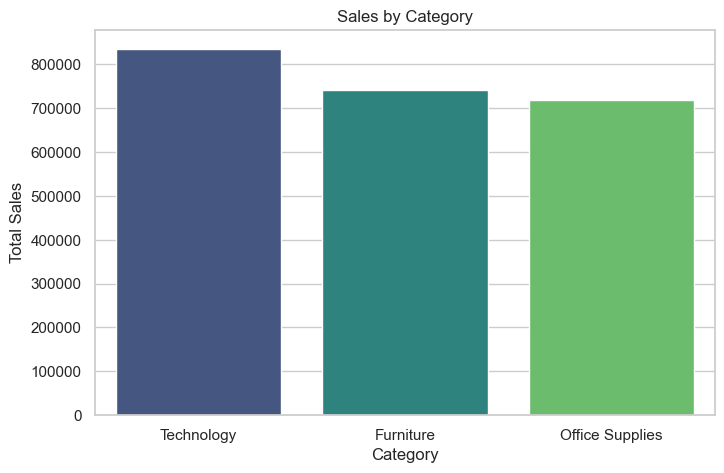

C:\Users\MMS\AppData\Local\Temp\ipykernel_3900\1567325665.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette="plasma")


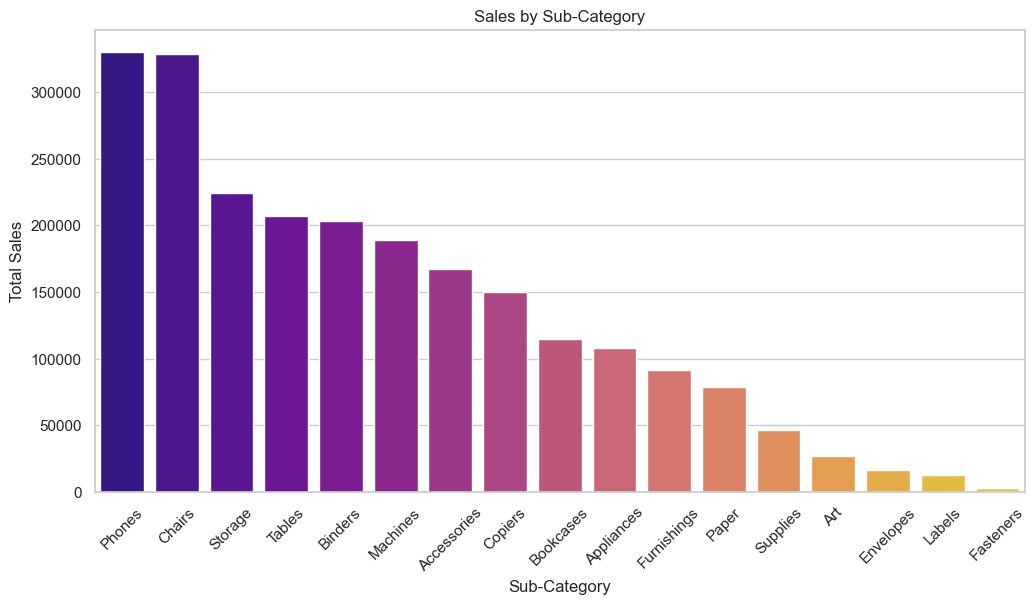

In [ ]:

#  Sales by Category & Subcategory
cat_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
subcat_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=cat_sales.index, y=cat_sales.values, palette="viridis")
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette="plasma")
plt.title("Sales by Sub-Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()


C:\Users\MMS\AppData\Local\Temp\ipykernel_3900\662420125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette="coolwarm")


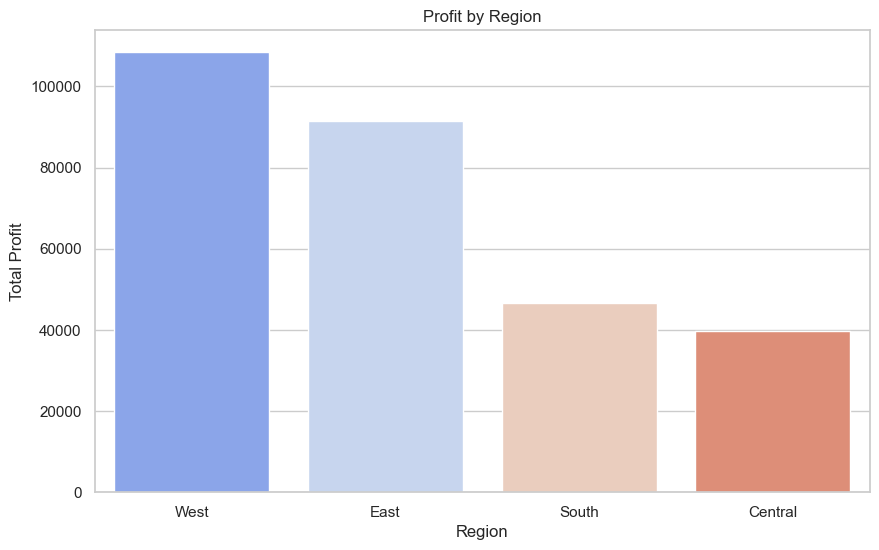

In [ ]:

#  Profit by Region
region_profit = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

sns.barplot(x=region_profit.index, y=region_profit.values, palette="coolwarm")
plt.title("Profit by Region")
plt.ylabel("Total Profit")
plt.show()


C:\Users\MMS\AppData\Local\Temp\ipykernel_3900\4097546401.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"].sum()


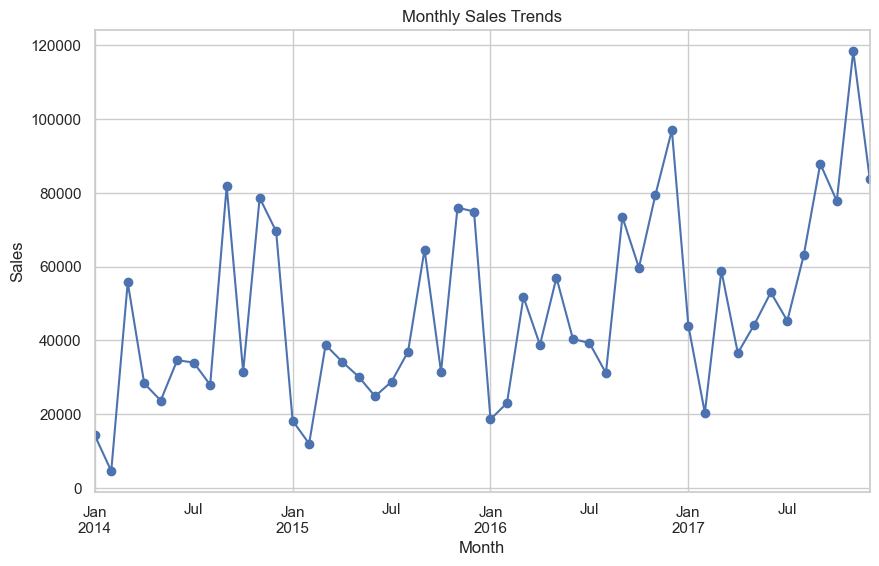

In [ ]:

#  Monthly Sales Trends
monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"].sum()

monthly_sales.plot(marker="o", linestyle="-")
plt.title("Monthly Sales Trends")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()


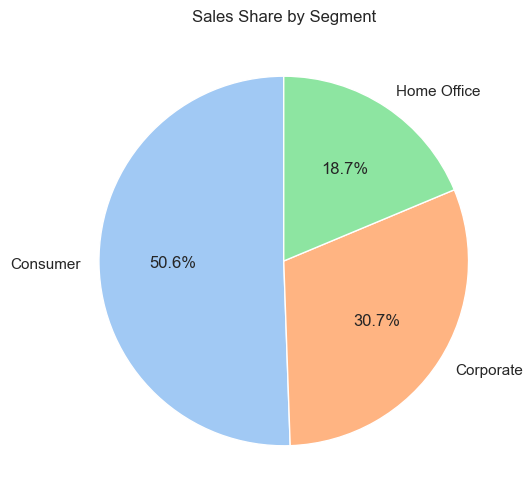

In [ ]:

#  Sales Share by Customer Segment
seg_sales = df.groupby("Segment")["Sales"].sum()

plt.pie(seg_sales, labels=seg_sales.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Share by Segment")
plt.show()


C:\Users\MMS\AppData\Local\Temp\ipykernel_3900\3790332588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette="magma")


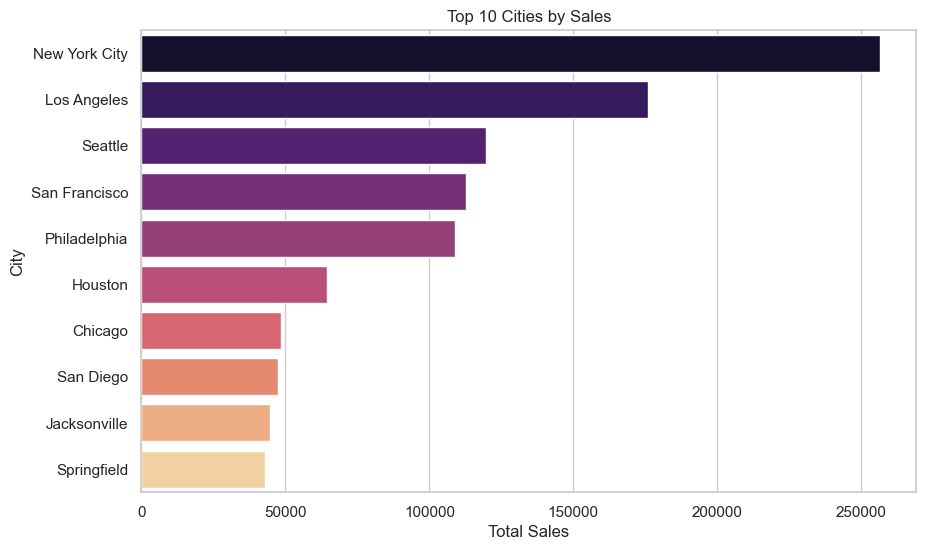

In [ ]:

#  Top 10 Cities by Sales
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=city_sales.values, y=city_sales.index, palette="magma")
plt.title("Top 10 Cities by Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()
